<a href="https://colab.research.google.com/github/vishnu43/NN_Project/blob/main/Plant_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, load_model

print("Loaded required libraries...")

Loaded required libraries...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fpath = "/content/drive/MyDrive/train2"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Apple_scab', 'Potato___healthy', 'Apple___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Leaf_Mold', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Grape___Esca_(Black_Measles)', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Grape___Black_rot', 'Corn_(maize)___healthy', 'Potato___Early_blight'] 

No. of categories =  25


In [ ]:
for index, category in enumerate(categories):
  print(category,index)

Apple___healthy 0
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 1
Tomato___healthy 2
Corn_(maize)___Northern_Leaf_Blight 3
Apple___Apple_scab 4
Potato___healthy 5
Apple___Black_rot 6
Tomato___Spider_mites Two-spotted_spider_mite 7
Tomato___Septoria_leaf_spot 8
Tomato___Tomato_Yellow_Leaf_Curl_Virus 9
Tomato___Early_blight 10
Tomato___Tomato_mosaic_virus 11
Tomato___Bacterial_spot 12
Apple___Cedar_apple_rust 13
Tomato___Leaf_Mold 14
Corn_(maize)___Common_rust_ 15
Tomato___Late_blight 16
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 17
Grape___healthy 18
Grape___Esca_(Black_Measles) 19
Potato___Late_blight 20
Tomato___Target_Spot 21
Grape___Black_rot 22
Corn_(maize)___healthy 23
Potato___Early_blight 24


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:100]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))
                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
print(set(labels))


No. of images loaded =  2500 
No. of labels loaded =  2500
<class 'list'> <class 'list'>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))
print(labels)
print(set(labels))

Images shape =  (1500, 227, 227, 3) 
Labels shape =  (1500,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[ 0  0  0 ... 14 14 14]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


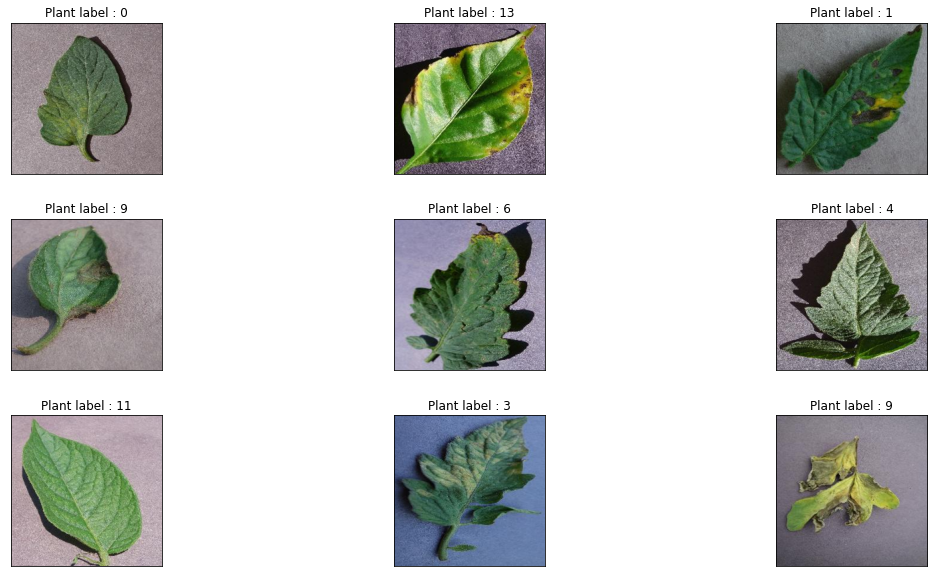

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])

        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_rand_images(images, labels)

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1497 1498 1499]

'n' values after shuffling =  [1412  898  469 ...   86  724  876]


In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1500, 227, 227, 3) 
Labels shape after shuffling =  (1500,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1500, 227, 227, 3)


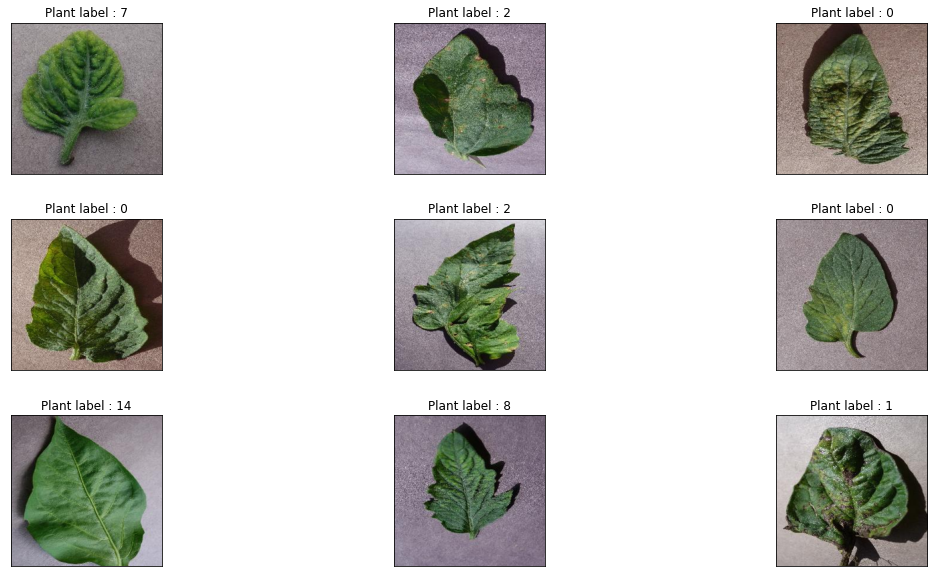

In [ ]:
display_rand_images(images, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1200, 227, 227, 3)
y_train shape =  (1200,)

x_test shape =  (300, 227, 227, 3)
y_test shape =  (300,)


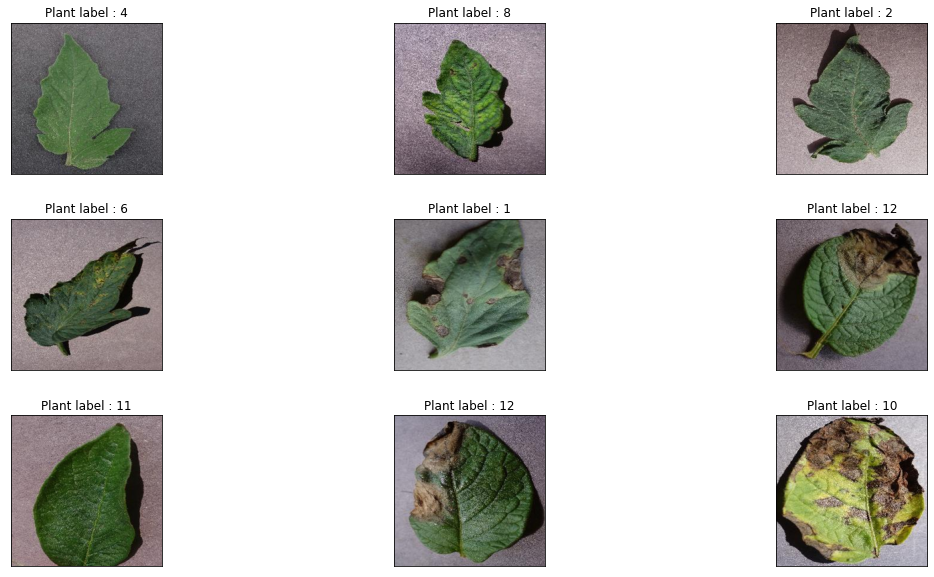

In [ ]:
display_rand_images(x_train, y_train)

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())
#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))
model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_accuracy:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("/content/drive/MyDrive/archive/models/{}.model".format(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'))

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_test , y_test ), callbacks=[checkpoint])

Epoch 1/70
38/38 [==============================] - 52s 80ms/step - loss: 3.5377 - accuracy: 0.1246 - val_loss: 103.4355 - val_accuracy: 0.0733
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-01-0.07.model/assets
Epoch 2/70
38/38 [==============================] - 2s 45ms/step - loss: 2.8379 - accuracy: 0.2354 - val_loss: 14.2930 - val_accuracy: 0.0633
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-02-0.06.model/assets
Epoch 3/70
38/38 [==============================] - 2s 41ms/step - loss: 2.3405 - accuracy: 0.3025 - val_loss: 5.8988 - val_accuracy: 0.1267
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-03-0.13.model/assets
Epoch 4/70
38/38 [==============================] - 2s 43ms/step - loss: 2.0969 - accuracy: 0.3659 - val_loss: 6.2896 - val_accuracy: 0.1167
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/mod

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test , y_test ), callbacks=[checkpoint])

Epoch 1/20
38/38 [==============================] - 36s 114ms/step - loss: 3.6228 - accuracy: 0.1289 - val_loss: 92.7751 - val_accuracy: 0.0733
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-01-0.07.model/assets
Epoch 2/20
38/38 [==============================] - 3s 81ms/step - loss: 2.8511 - accuracy: 0.2008 - val_loss: 15.3955 - val_accuracy: 0.0600
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-02-0.06.model/assets
Epoch 3/20
38/38 [==============================] - 3s 82ms/step - loss: 2.4723 - accuracy: 0.2957 - val_loss: 9.2250 - val_accuracy: 0.1067
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/models/cnn-parameters-improvement-03-0.11.model/assets
Epoch 4/20
38/38 [==============================] - 3s 80ms/step - loss: 2.1096 - accuracy: 0.3739 - val_loss: 4.3039 - val_accuracy: 0.1433
INFO:tensorflow:Assets written to: /content/drive/MyDrive/archive/mod

In [ ]:
best_model = load_model(filepath='/content/drive/MyDrive/archive/models/cnn-parameters-improvement-64-0.74.model')

In [ ]:
loss, accuracy = best_model.evaluate(x_test, y_test)

print(loss,accuracy)

10/10 [==============================] - 0s 19ms/step - loss: 1.2192 - accuracy: 0.7433
1.219197392463684 0.7433333396911621


In [ ]:
pred = best_model.predict(x_test)


In [ ]:
C1=categories

def get_pred_labs(Pred_res):

    """
    comments : this function get the predicted label with score
    input    : predicted array
    return   : Predicted label and score
    """

    indices = (-Pred_res).argsort()[:1]

    print(indices)

    return C1[indices[0]],Pred_res[indices[0]]


In [ ]:
pred_label,score=get_pred_labs(pred[1])

print(pred_label)
print(score)

[10]
Potato___Early_blight
0.96556413


[220]
Potato___Early_blight
[10]
Potato___Early_blight
[10]
[10]


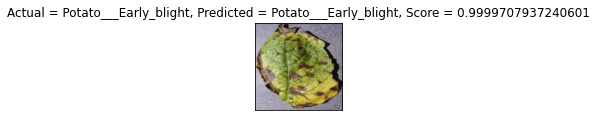

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0

for i in range(1):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)
    print(r)
    plt.subplot(5, 4, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(x_test[r[0]])
    # plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )

    print(C1[y_test[r[0]]])
    print(get_pred_labs(pred[r[0]])[0])

    plt.title('Actual = {}, Predicted = {}, Score = {}'.format(C1[y_test[r[0]]] , get_pred_labs(pred[r[0]])[0],get_pred_labs(pred[r[0]])[1] ) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
plt.figure(1 , figsize = (30 , 30))
n = 0

for i in range(21):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)

    plt.subplot(7, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(x_test[r[0]])
    # plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    # plt.xticks([]) , plt.yticks([])
    plt.title('Actual = {}, Predicted = {}'.format(C1[y_test[r[0]]] , get_pred_labs(pred[r[0]])[0] ) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
best_model = load_model(filepath='/content/drive/MyDrive/archive/models/cnn-parameters-improvement-16-0.76.model')


In [ ]:
def single_image(filepath):
                img_lst=[]
                img = cv2.imread(filepath)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))
                images = np.array(img_lst)
                n = np.arange(images.shape[0])
                np.random.seed(random_seed)
                np.random.shuffle(n)
                images = images[n]
                images = images.astype(np.float32)
                images = images/255
                return images

In [ ]:
file_path ="/content/drive/MyDrive/archive/PlantVillage/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"
image1 = single_image(file_path)

In [ ]:
pred1 = best_model.predict(image1)

In [ ]:
C1=categories

def get_pred_labs(Pred_res):

    """
    comments : this function get the predicted label with score
    input    : predicted array
    return   : Predicted label and score
    """

    indices = (-Pred_res).argsort()[:1]

    print(indices)

    return C1[indices[0]],Pred_res[indices[0]]


In [ ]:
pred_label,score=get_pred_labs(pred1[0])
# pred_label[0][0]
# # score
data=get_pred_labs(pred1[0])
print(data[0])


[5]
[5]
Tomato_Bacterial_spot


In [ ]:
if data[0] == "Potato___Early_blight":
  print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Early_blight":
  print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Spider_mites_Two_spotted_spider_mite":
  print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Septoria_leaf_spot":
  print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Bacterial_spot":
   print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
   print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Late_blight":
  print("Remedies: Monitor the field, remove and destroy infected leaves. \r\n  Treat organically with copper spray. \r\n  Use chemical fungicides,the best of which for tomatoes is chlorothalonil.")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato__Target_Spot":
   print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
   print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_Leaf_Mold":
   print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
   print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato__Tomato_YellowLeaf__Curl_Virus":
   print("Remedies: Monitor the field, handpick diseased plants and bury them. \r\n  Use sticky yellow plastic traps. \r\n  Spray insecticides such as organophosphates, carbametes during the seedliing stage. \r\n Use copper fungicites")
   print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato_healthy":
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Tomato__Tomato_mosaic_virus":
    print("Remedies: Monitor the field, handpick diseased plants and bury them. \r\n  Use sticky yellow plastic traps. \r\n  Spray insecticides such as organophosphates, carbametes during the seedliing stage. \r\n Use copper fungicites")
    print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Potato___healthy":
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Pepper__bell___healthy":
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Potato___Late_blight":
  print("Remedies: Monitor the field, remove and destroy infected leaves. \r\n  Treat organically with copper spray. \r\n  Use chemical fungicides,the best of which for tomatoes is chlorothalonil.")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")
elif data[0] == "Pepper__bell___Bacterial_spot":
  print("Remedies: Discard or destroy any affected plants. \r\n          Do not compost them. \r\n          Rotate yoour tomato plants yearly to prevent re-infection next year. \r\n          Use copper fungicites")
  print("Benefits: Manages Diabetes \r\n          Prevent Osteoporosis \r\n          Healthy Nervous System \r\n          May lower blood pressure\r\n          Loaded with antioxidants \r\n          May decrease blood fats\r\n          Helps prevent hair loss ")



Remedies: Discard or destroy any affected plants. 
          Do not compost them. 
          Rotate yoour tomato plants yearly to prevent re-infection next year. 
          Use copper fungicites
Benefits: Manages Diabetes 
          Prevent Osteoporosis 
          Healthy Nervous System 
          May lower blood pressure
          Loaded with antioxidants 
          May decrease blood fats
          Helps prevent hair loss 
